In [1]:
import tensorflow as tf

2022-06-11 08:00:27.050942: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-11 08:00:27.050963: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [42]:
model = tf.keras.models.load_model('./NEW Re Cleaning Dataset/Best-Model-Inception_V3-NoCNN-v4-val_loss.h5')
# model.summary()

In [43]:
import cv2 as cv
import numpy as np
from keras.preprocessing import image

img_path = './../dataset/image-dataset/Testing/Rendang Sapi/4d215494fa.jpg'
img = cv.imread(img_path)
img = cv.resize(img, (300, 300))
img = np.reshape(img, (-1, 300, 300, 3))
# img = img.reshape(-1, 300, 300)
result = model.predict(img)
result.argmax()
target_names[result.argmax()]

1/1 [==============================] - 2s 2s/step


'Non-Food'

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
testing_generator = ImageDataGenerator(
    rescale=1./255
)

testing = testing_generator.flow_from_directory('../dataset/image-dataset/Testing',
    target_size=(300, 300),
    batch_size = 64,
    shuffle= False,
    class_mode='categorical'
)

Found 409 images belonging to 21 classes.


In [45]:
import scipy 
# model.evaluate(testing)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
Y_pred = model.predict(testing)
y_pred = []
for pred in Y_pred : 
    y_pred.append(np.argmax(pred))
y_pred = np.array(y_pred)

7/7 [==============================] - 38s 5s/step


In [36]:
cm = confusion_matrix(testing.classes, y_pred)

In [33]:
from matplotlib import pyplot as plt
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/home/avei/.pyenv/versions/3.7.9/envs/Project-Anya/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


Normalized confusion matrix


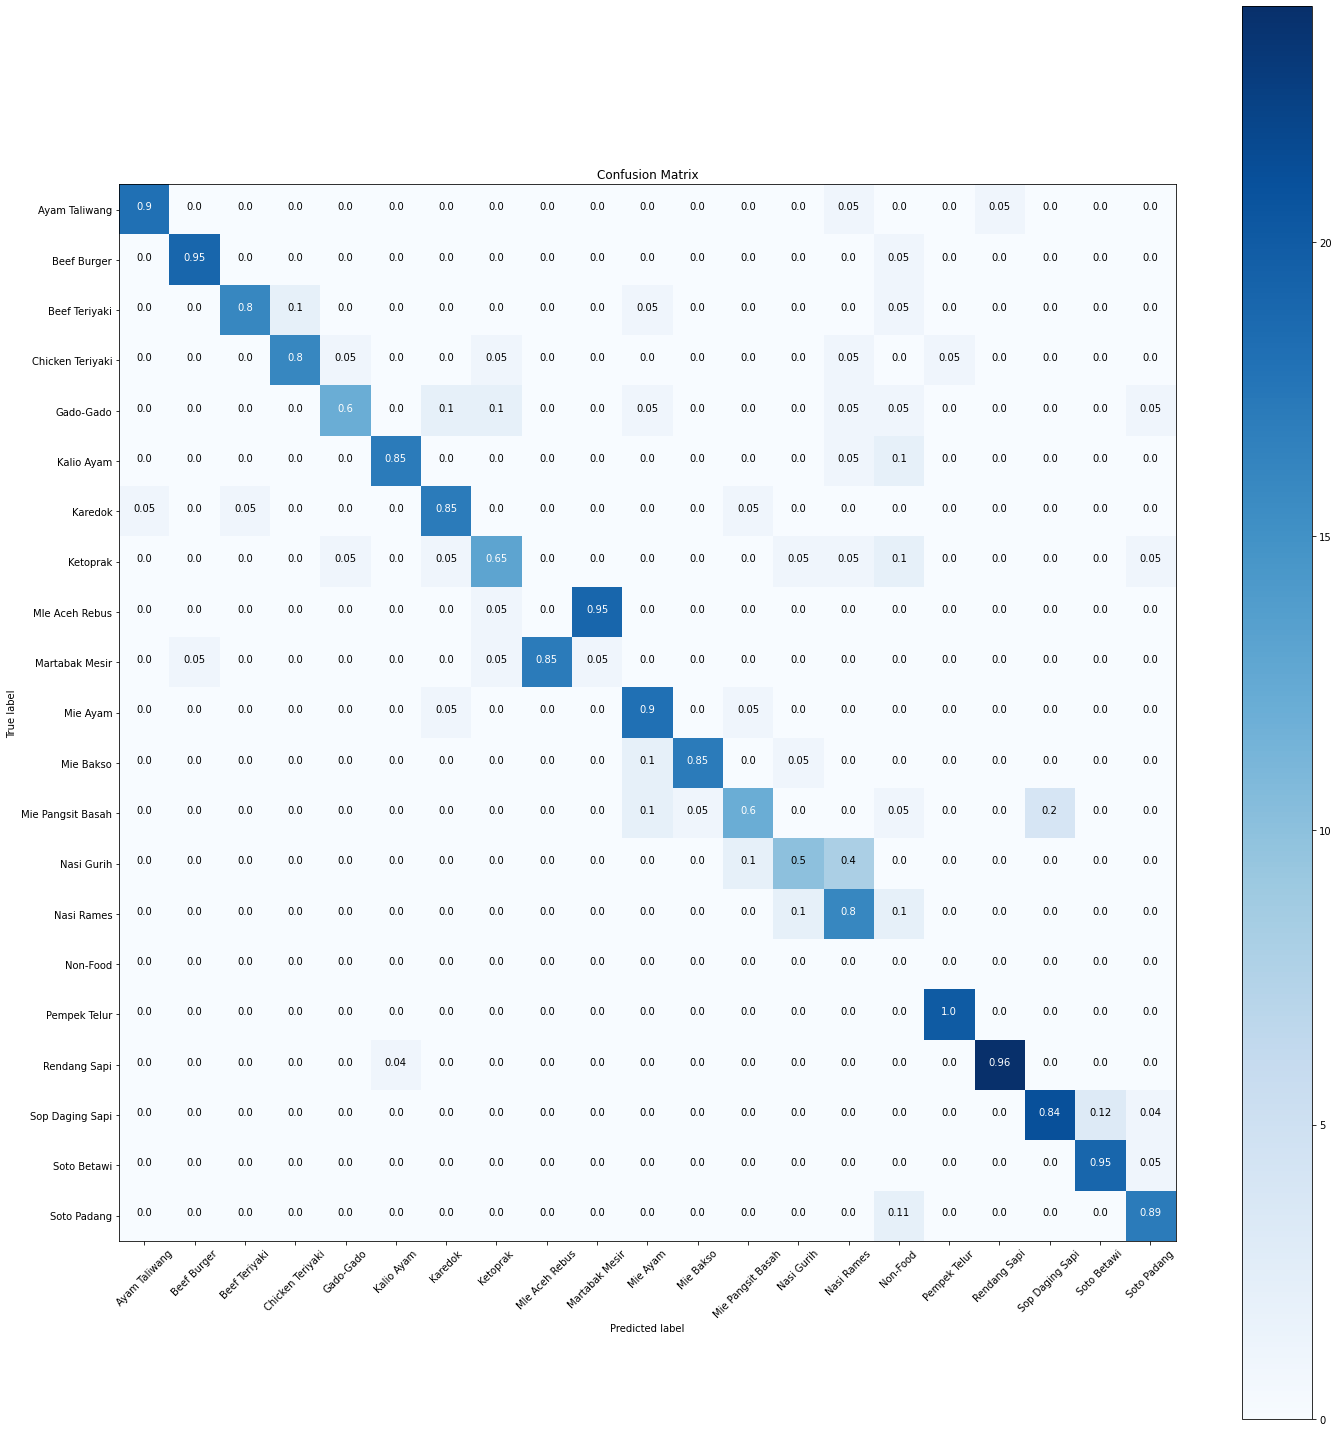

In [35]:
import itertools 
target_names = []
for key in testing.class_indices : 
    target_names.append(key)

plot_confusion_matrix(cm, target_names, title="Confusion Matrix")